In [1]:
from nba_api.stats.endpoints import leagueleaders
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from nba_api.stats.endpoints import leaguedashplayerstats, synergyplaytypes
from nba_api.stats.endpoints import teamyearbyyearstats, playercareerstats
from nba_api.stats.static.players import find_players_by_full_name, find_player_by_id

from matplotlib.offsetbox import OffsetImage, AnnotationBbox, DrawingArea, TextArea
from matplotlib.patches import Circle, FancyArrowPatch, FancyArrow, ArrowStyle, Arrow
import matplotlib.ticker as mtick
import time
from tqdm import tqdm
from sklearn.cluster import KMeans
import numpy as np
import functools
import seaborn as sns


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

plt.style.use('fivethirtyeight')

/var/folders/wg/8c_xwvyn2tl18ply9w25rmgm0000gn/T/ipykernel_35255/889999587.py:20: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
excel_df = pd.read_excel('/Users/franhuzjan/Downloads/BBM_PlayerRankings.xls')

excel_df

,Own,Round,Rank,Y!Adp,Y!%,Adv%,Adv+-,Act%,Value,PosV,...,USG,pV,3V,rV,aV,sV,bV,fg%V,ft%V,toV
0,Other Active,1,1,1.3,100,NaN,NaN,NaN,0.827208,0.817700,...,27.581458,1.128868,-0.763468,2.448029,2.619067,0.818488,0.062185,2.809769,0.338711,-2.016773
1,Other Inactive,1,2,3.4,99,NaN,NaN,NaN,0.808261,0.827583,...,36.706887,2.456281,-0.603329,1.752806,0.103390,0.077371,2.032522,1.498604,1.783614,-1.826910
2,Active,1,3,47.4,98,NaN,NaN,NaN,0.736656,0.739808,...,32.429828,2.196660,-0.738741,-0.434152,0.681648,1.915631,0.595057,0.440979,3.066116,-1.093297
3,Other Active,1,4,17.6,100,NaN,NaN,NaN,0.688074,0.707397,...,28.308369,1.348164,-1.211714,2.734148,-0.565435,0.229565,2.689575,1.638348,-0.364334,-0.305650
4,NaN,1,5,5.1,98,NaN,NaN,NaN,0.663338,0.688318,...,29.277104,1.835812,0.297877,0.315516,0.479544,-0.708423,1.506022,1.671508,2.270749,-1.698566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,NaN,18,176,0.0,1,NaN,NaN,NaN,-0.379332,-0.388840,...,17.030537,-1.532302,-0.734872,-1.190773,-1.103758,-1.546027,-0.150657,0.519425,0.842387,1.482590
176,Other Inactive,18,177,140.2,36,NaN,NaN,NaN,-0.380396,-0.377244,...,25.619253,-0.568213,0.185926,-1.340447,-0.021355,-0.955700,-0.755230,-0.646085,0.638228,0.039310
177,NaN,18,178,120.8,34,NaN,NaN,NaN,-0.380606,-0.361284,...,17.301556,-0.905283,-0.290258,0.891934,-1.116424,-1.627197,0.059936,-0.627867,-0.504315,0.694020
178,NaN,18,179,136.3,3,NaN,NaN,NaN,-0.385002,-0.360022,...,12.934367,-1.593673,-0.296397,-0.847771,-1.072091,-0.869611,-0.612483,-0.109965,0.056995,1.879977


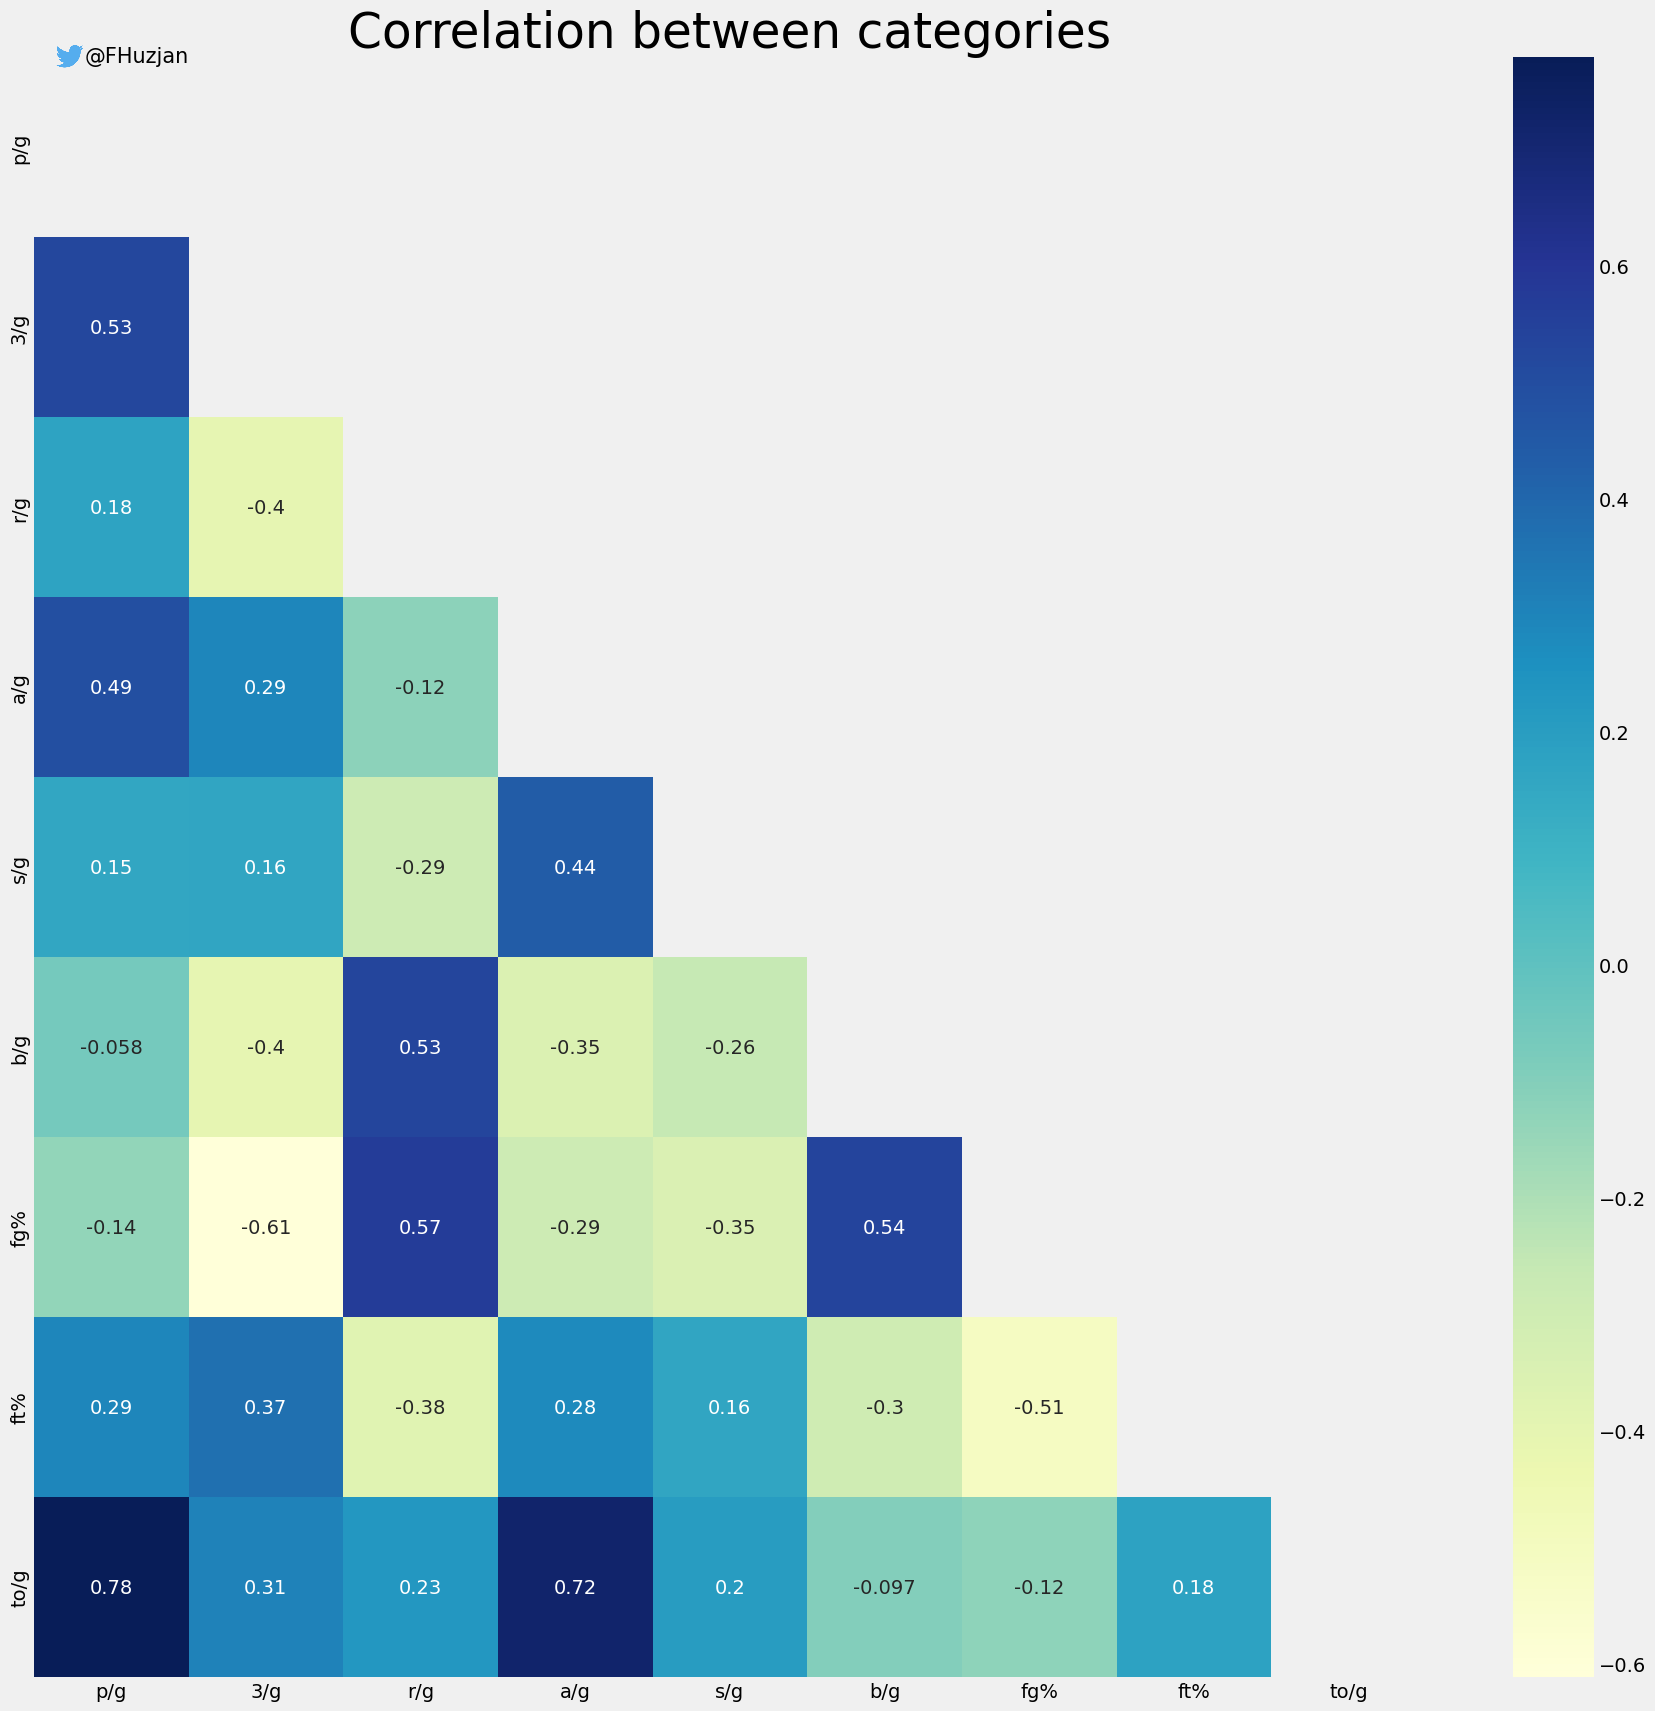

In [39]:
cats = ['p/g',
         '3/g',
         'r/g',
         'a/g',
         's/g',
         'b/g',
         'fg%',
         'ft%',
         'to/g']

df = excel_df[cats]

corr= df.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 

fig, ax = plt.subplots(figsize=(20, 20))

# cmap = 'vlag'
cmap = "YlGnBu"
dataplot = sns.heatmap(df.corr(), cmap=cmap, annot=True, mask=matrix)
  
# plt.axis('off')
plt.grid(False)
plt.title('Correlation between categories', fontsize=35)
# displaying heatmap
ab = AnnotationBbox(OffsetImage(plt.imread(f'twitter_logo (1).png'), zoom=0.1), (0.23, 0), frameon=False)
ax.add_artist(ab)
ax.text(x=1, y=0.025, ha='right', s='@FHuzjan', size=15)
plt.savefig('Graphs/correlation.png', bbox_inches='tight')